@author: Ivan Munoz Rodriguez

Program example to compute the detectability of G264-012 (J21466+668) following Howard 2010 methodology

In [10]:
#from utils import *
import os
import sys
import pandas as pd
import numpy as np

#print(sys.path)

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

# Change the current working directory
os.chdir('C:/Users/pja/ownCloud/Private/Documentos/Work/Temporal/Python_scripts/Jupyter Notebooks/Detectability Ivan Muñoz/ex_G264-master/')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

from utils import *

Current working directory: C:\Users\pja\ownCloud\Private\Documentos\Work\Temporal\Python_scripts\Jupyter Notebooks\Detectability Ivan Muñoz\ex_G264-master
os.getcwd() returns an object of type: <class 'str'>
Current working directory: C:\Users\pja\ownCloud\Private\Documentos\Work\Temporal\Python_scripts\Jupyter Notebooks\Detectability Ivan Muñoz\ex_G264-master


# Paths

Inputs, I define diffents paths for differents fits. **CHANGE THE PATHS**

In [11]:
#pathFileIn = "/Users/IvanMuRo/py_master/tfm/G264-012_Gl393/input/"
#pathFitIn = "/Users/IvanMuRo/py_master/tfm/G264-012_Gl393/input/fit/"
pathFileIn = "C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data/"
pathFitIn = "C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity/"

Outputs

In [12]:
#pathOut = "/Users/IvanMuRo/py_master/tfm/G264-012_Gl393/output/"
#pathFitOut = "/Users/IvanMuRo/py_master/tfm/G264-012_Gl393/output/fit/"
pathOut = "C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity/output/"
pathFitOut = "C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity/output/fit/"

# Files

##  CARMENCITA

I load CARMENCITA to extract the mass of the stars using their name after. **BE CAREFULL if you want to use this could crash if the format is different!. This is only used to give the mass to the star, so you can also skip this and give the mass by hand after!**.

In [13]:
infileCarmencita = pathFileIn + "carmencita.102.csv"
df = pd.read_csv(infileCarmencita, sep=',')
pd.set_option('display.max_columns', df.shape[0] + 1 ) #ENSEÑA TODAS LAS COLUMNAS DE LA TABLA
dfCarmenes = df.fillna("")

In [14]:
dfCarmenes = dfCarmenes[dfCarmenes['RV'].str.contains("CARMENES")] #FILTRAMOS SOLO LOS DATOS DE CARMENES
dfCarmenes = dfCarmenes.reset_index(drop = True) #Iniciamos indices despues del sort

len(dfCarmenes)
#print(dfCarmenes)

352

## Radial Velocity Data

We take the data (bjd, rv and error) from the files. The files must have the format of starting with "J" have a name of 42 characters (completed with "." + ".dat". We also create a vector to save the names for the plots from the file eliminating the "." and "_" factors. **CAREFUL, I take the names of the star/case(w planets, whithout...) from the file, and I use the positions on the name to do it. Check for the new case, or do it by hand. glob will only take those files that the name fit the lenght of the string in ''**

In [15]:
filesList = sorted(glob.glob(pathFileIn + "J?????????????????????????????????????????.dat"))
#filesList = sorted(glob.glob(pathFileIn + "rv?.dat"))
#filesList = [pathFileIn + 'rvs.dat']
namesPlot = []
for file in filesList:
    #namesPlot.append((file[51:-4].replace("_", " ")).replace(".", ""))
    #namesPlot.append(file[51:-4])
    namesPlot.append(file[104:-4])
sorted(namesPlot)
#namesPlot = (rvs)
print(filesList,namesPlot,len(namesPlot))

['C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\\J06371+175_rvs.............................dat', 'C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\\J06371+175_rvs_2p_.........................dat', 'C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\\J06371+175_rvs_GP..........................dat', 'C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\\J06371+175_rvs_GP_2p_......................dat'] ['J06371+175_rvs............................', 'J06371+175_rvs_2p_........................', 'J06371+175_rvs_GP.........................', 'J06371+175_rvs_GP_2p_.....................'] 4


Read radial velocity data, **CAREFULL with the format**

In [16]:
bjd = []
rv = [] 
rvError = []

for index, file in enumerate(filesList):
    print(file)
    data = np.genfromtxt(file, comments='#')[:,0:]
    bjd.append(data[:, 0])
    rv.append(data[:, 1])
    rvError.append(data[:, 2])

C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\J06371+175_rvs.............................dat
C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\J06371+175_rvs_2p_.........................dat
C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\J06371+175_rvs_GP..........................dat
C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Data\J06371+175_rvs_GP_2p_......................dat


# Fit
We create some grids to make the fits, using a fuction created by us

In [17]:
order_ini = 0
orden_diez_fin = 5
n_medidas = 2000
tau = grid_logSpaced(n_medidas, order_ini, orden_diez_fin)

order_ini = 0
orden_diez_fin = 5
n_medidas_coarse = 20
tau_coarse = grid_logSpaced(n_medidas_coarse, order_ini, orden_diez_fin)
tau_coarse_plot = grid_logSpaced(n_medidas_coarse, order_ini, 5)
tau_coarse_plot.extend(tau_coarse)
tau_coarse_plot.sort() 

order_m_ini = -1 
n_medidas_coarse = 20
orden_m_fin = 6  
m_coarse = grid_logSpaced(n_medidas_coarse, order_m_ini, orden_m_fin)

I take the mass of the star from CARMENCITA file ( they will be the same two stars repited the same times as files for each one). **You can do this by hand as I commented before**

In [25]:
msList = []
for i,star in enumerate(filesList):
    index = 0
    for name in dfCarmenes["Karmn"]:
#        if star[51:-36] in name:
        if star[104:-36] in name:
            print(star[104:-36])
            msList.append(dfCarmenes.iloc[index]["M_Msol"]) #save the mass of the star in a vector
        index = index + 1
if len(namesPlot) == 1:
    namesPlot = ''.join(str(item) for item in namesPlot)
    len_namesPlot = 1
    msList = ''.join(str(item) for item in msList)
    msList = float(msList)
else:
    len_namesPlot = len(namesPlot)


#Cambio = (pathFitOut + namesPlot.replace(".", "") + "_rv.pdf")
#print(type(pathFitIn), type(pathFitOut), type(msList), len_namesPlot, type(rv), type(rvError), type(bjd), tau, type(tau_coarse), type(tau_coarse_plot), type(namesPlot))
#print(namesPlot,Cambio,pathFitOut)
print("Stellar mass = ", msList)

J06371+175
J06371+175
J06371+175
J06371+175
Stellar mass =  [0.439, 0.439, 0.439, 0.439]


Now we make the fit to the RV and we can see some graphs to check the process, they are also saved in the paths that we defined before

Run the block below just one, it will generate files with the resulting fits!.

At the end of the block it would make some sound through the terminal that means that the fitting ended

PJA: Cuidado, hay algun problema con la version de iMinuit. He tenido que degradarla de la 2.X a la 1.54. Habria que verificar de nuevo si, tras algunos cambios hechos en el programa, la version mas nueva vuelve a funcionar.

PJA2: La grafica da algun problema cuando namesPlot se pasa como una lista ['rvs'] en vez de como una string, cuando el numero de ficheros es solo uno. Cuando se hace esto, el programa funciona pero se queja cuando quiere seguir ejecutando el loop para len_file > 1

PJA : 4
J06371+175_rvs............................
0.0 %



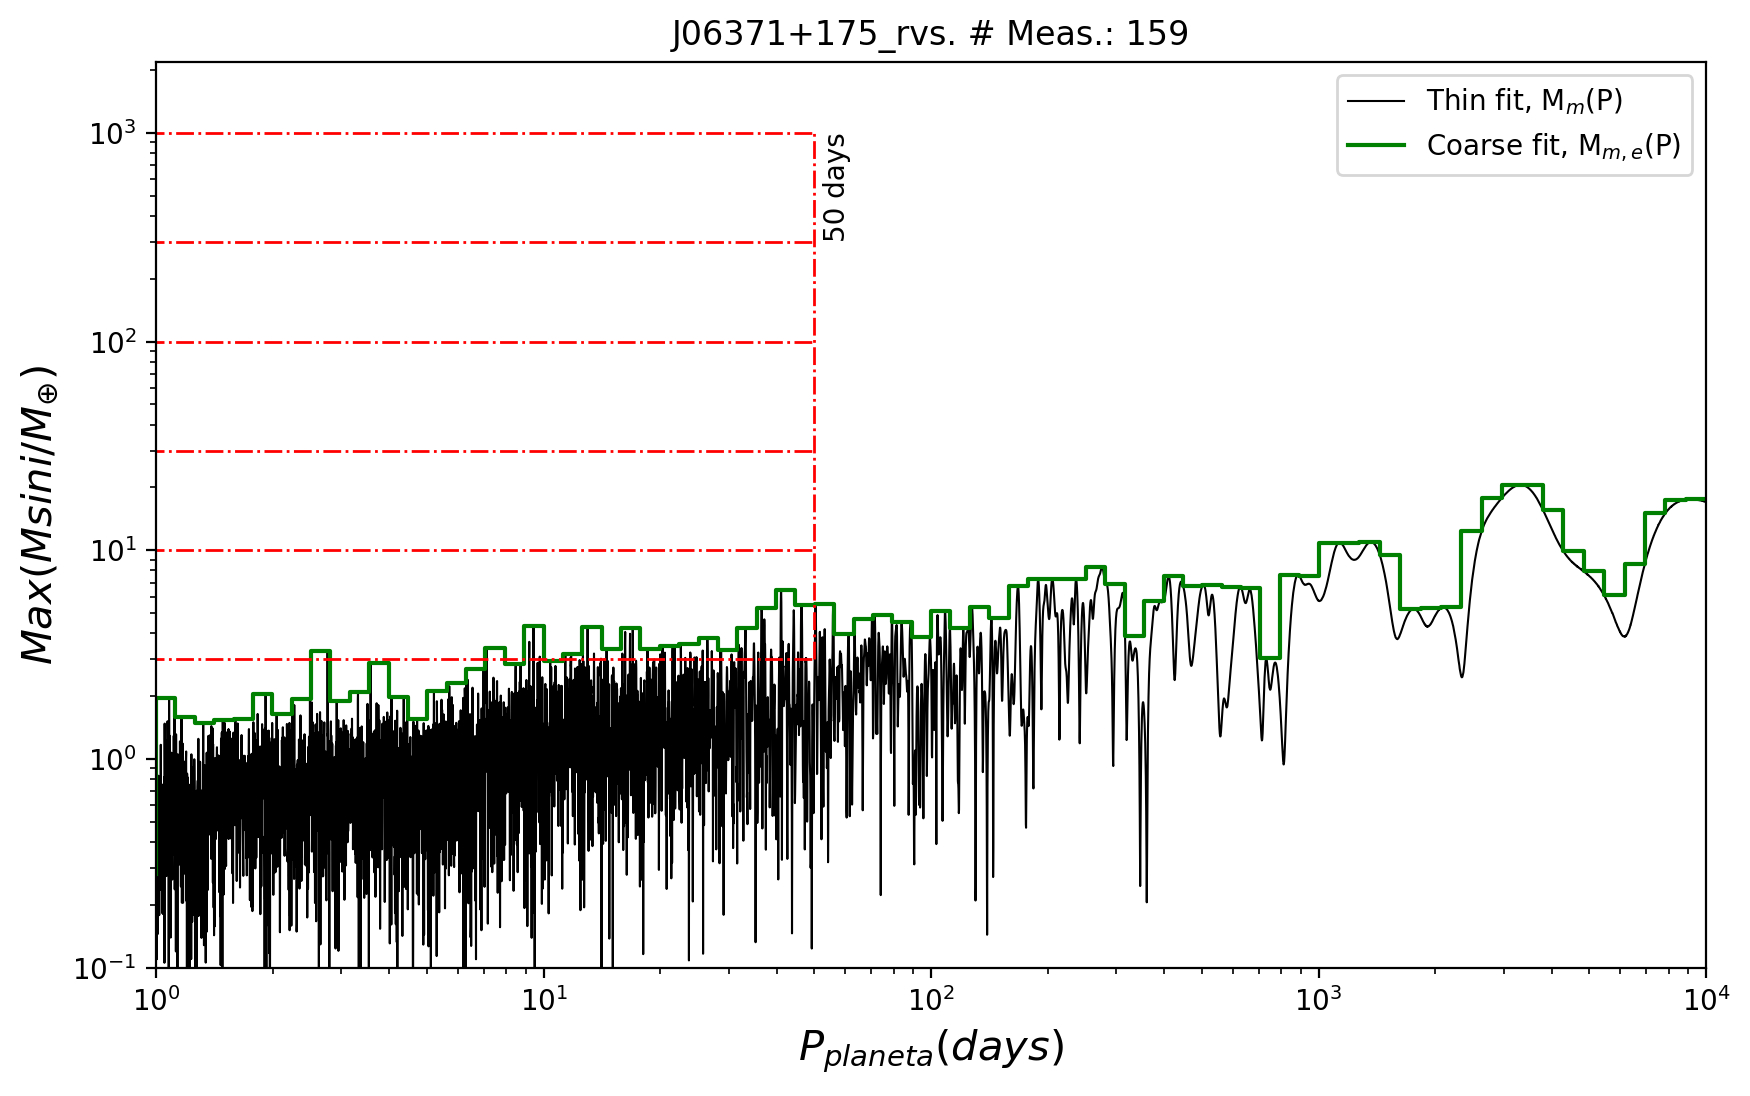

J06371+175_rvs_2p_........................
25.0 %



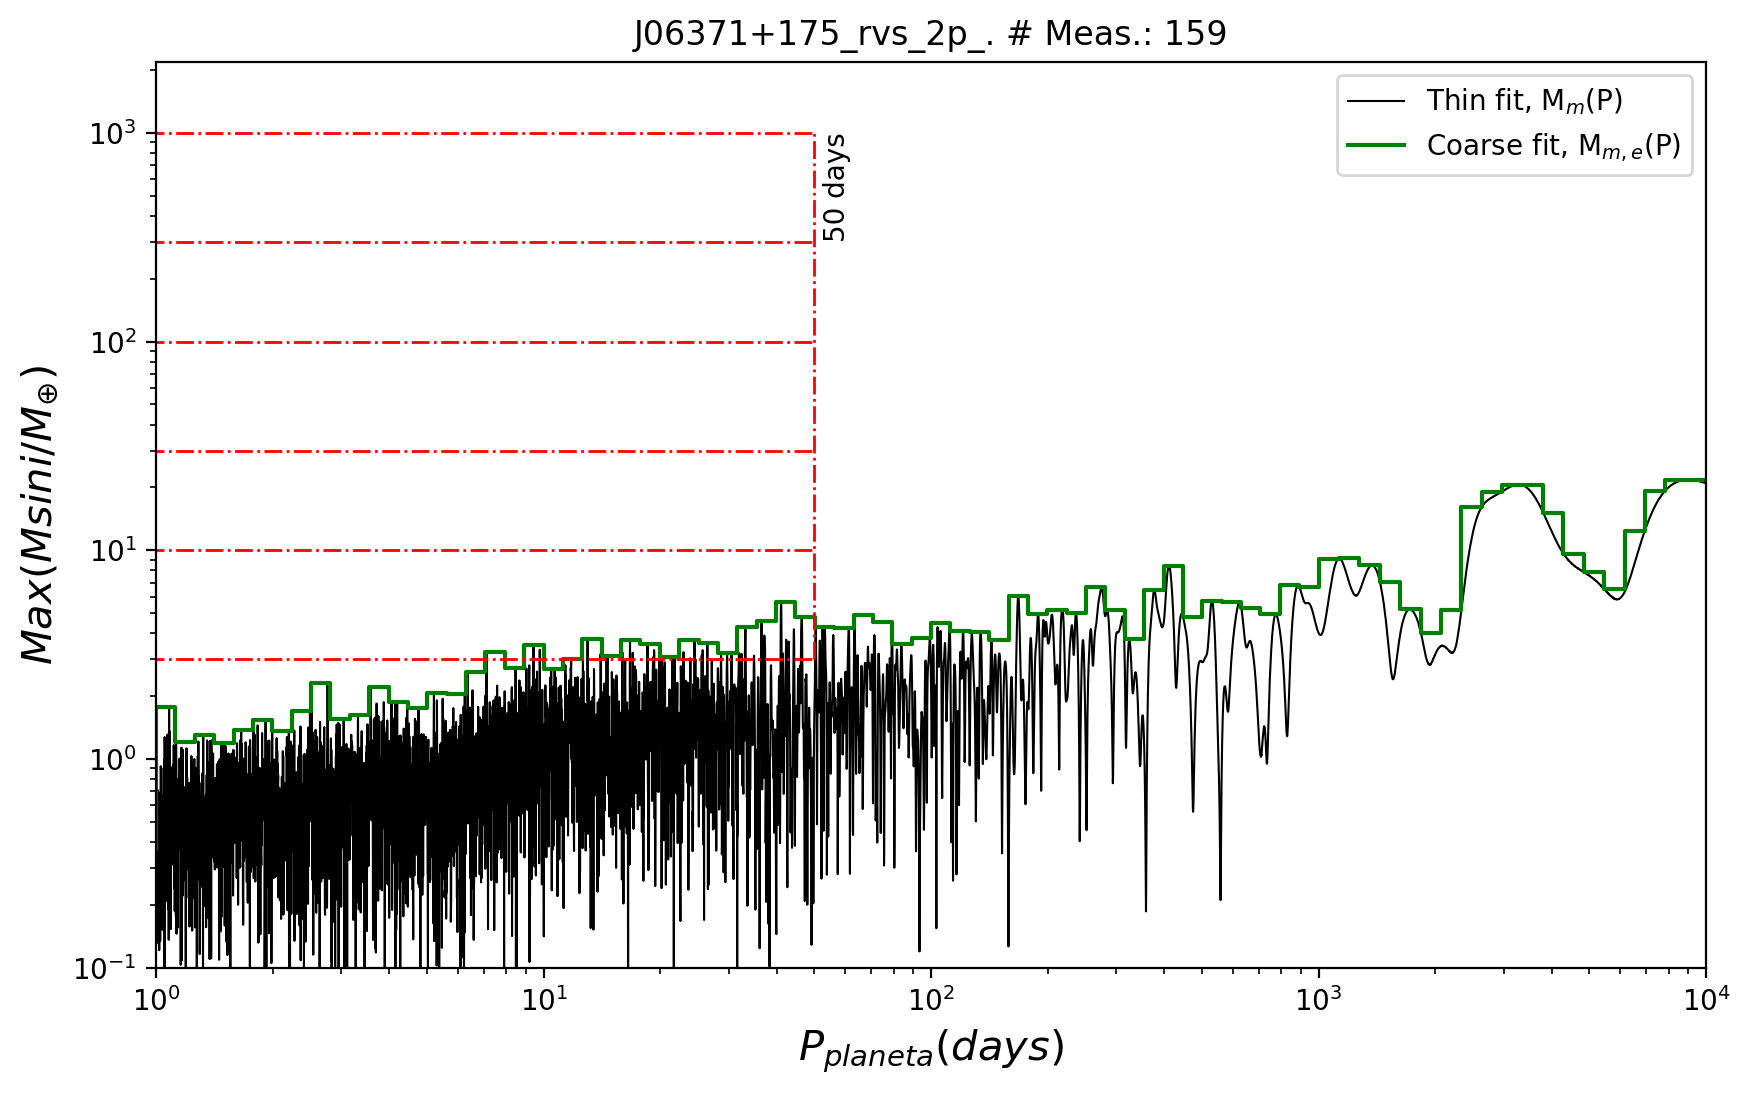

J06371+175_rvs_GP.........................
50.0 %



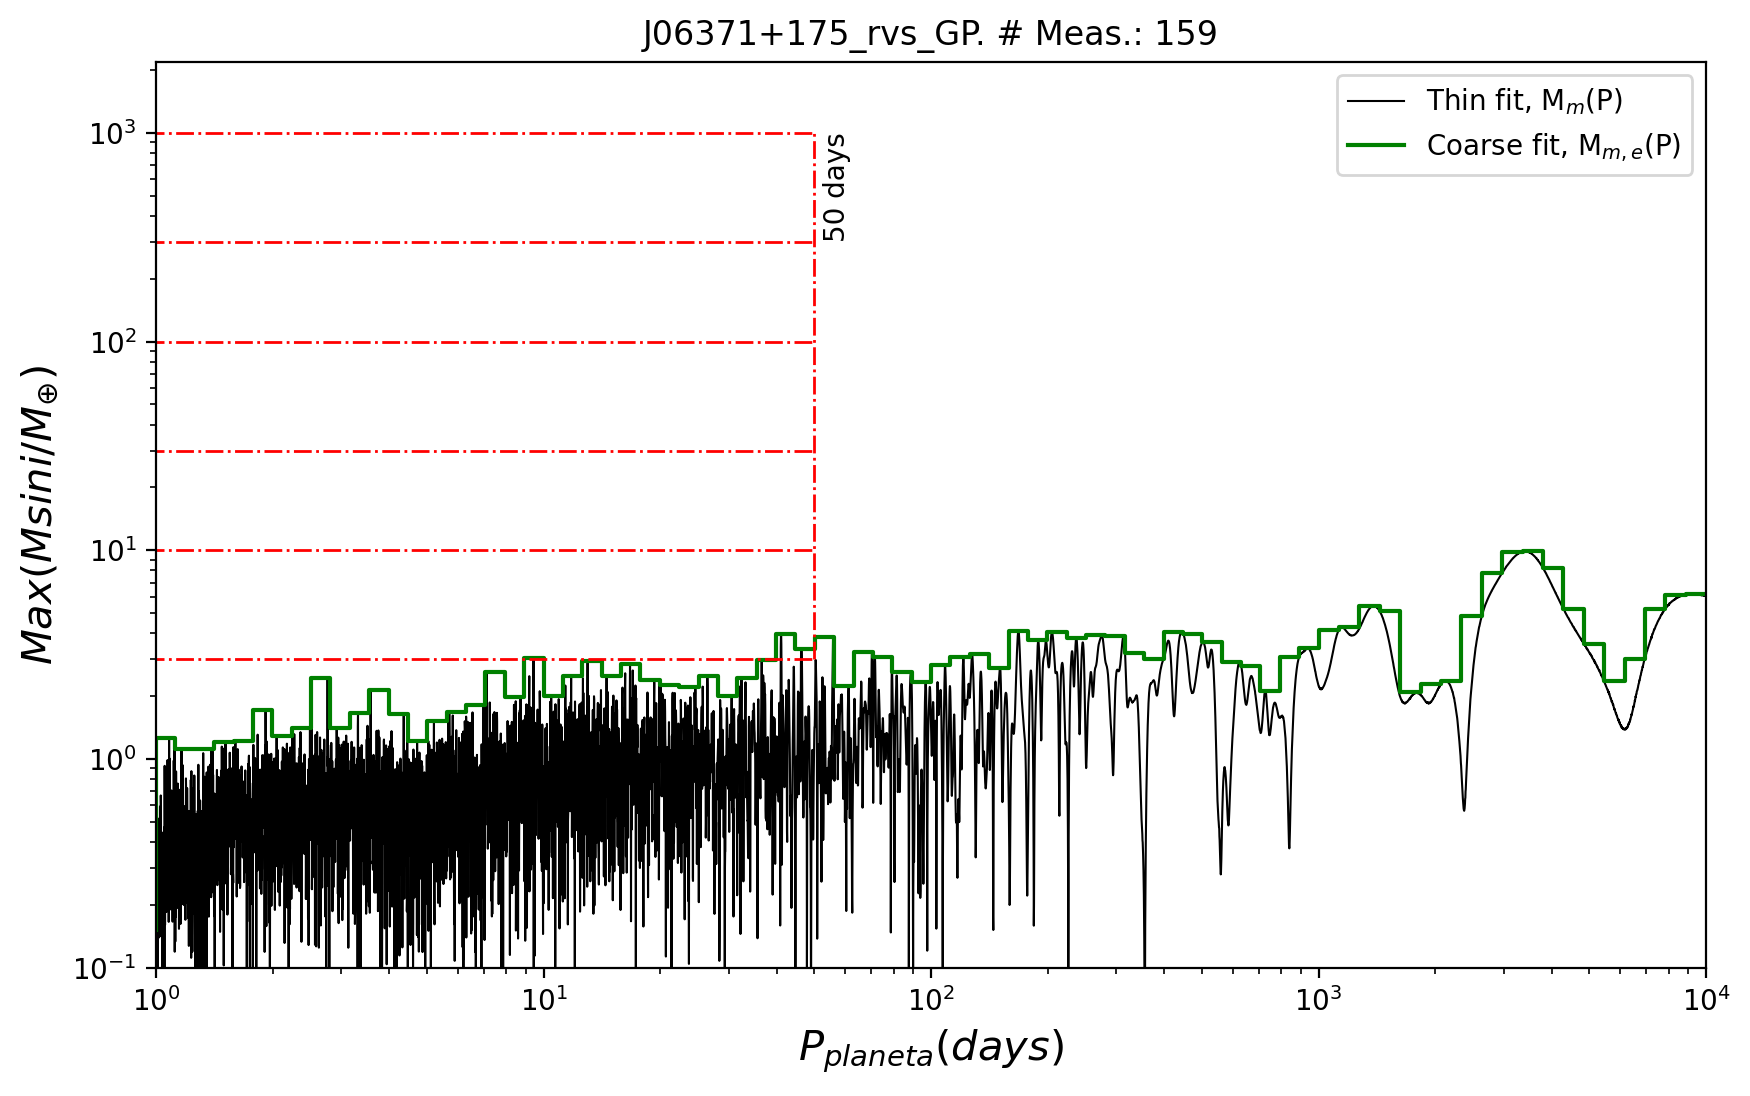

J06371+175_rvs_GP_2p_.....................
75.0 %



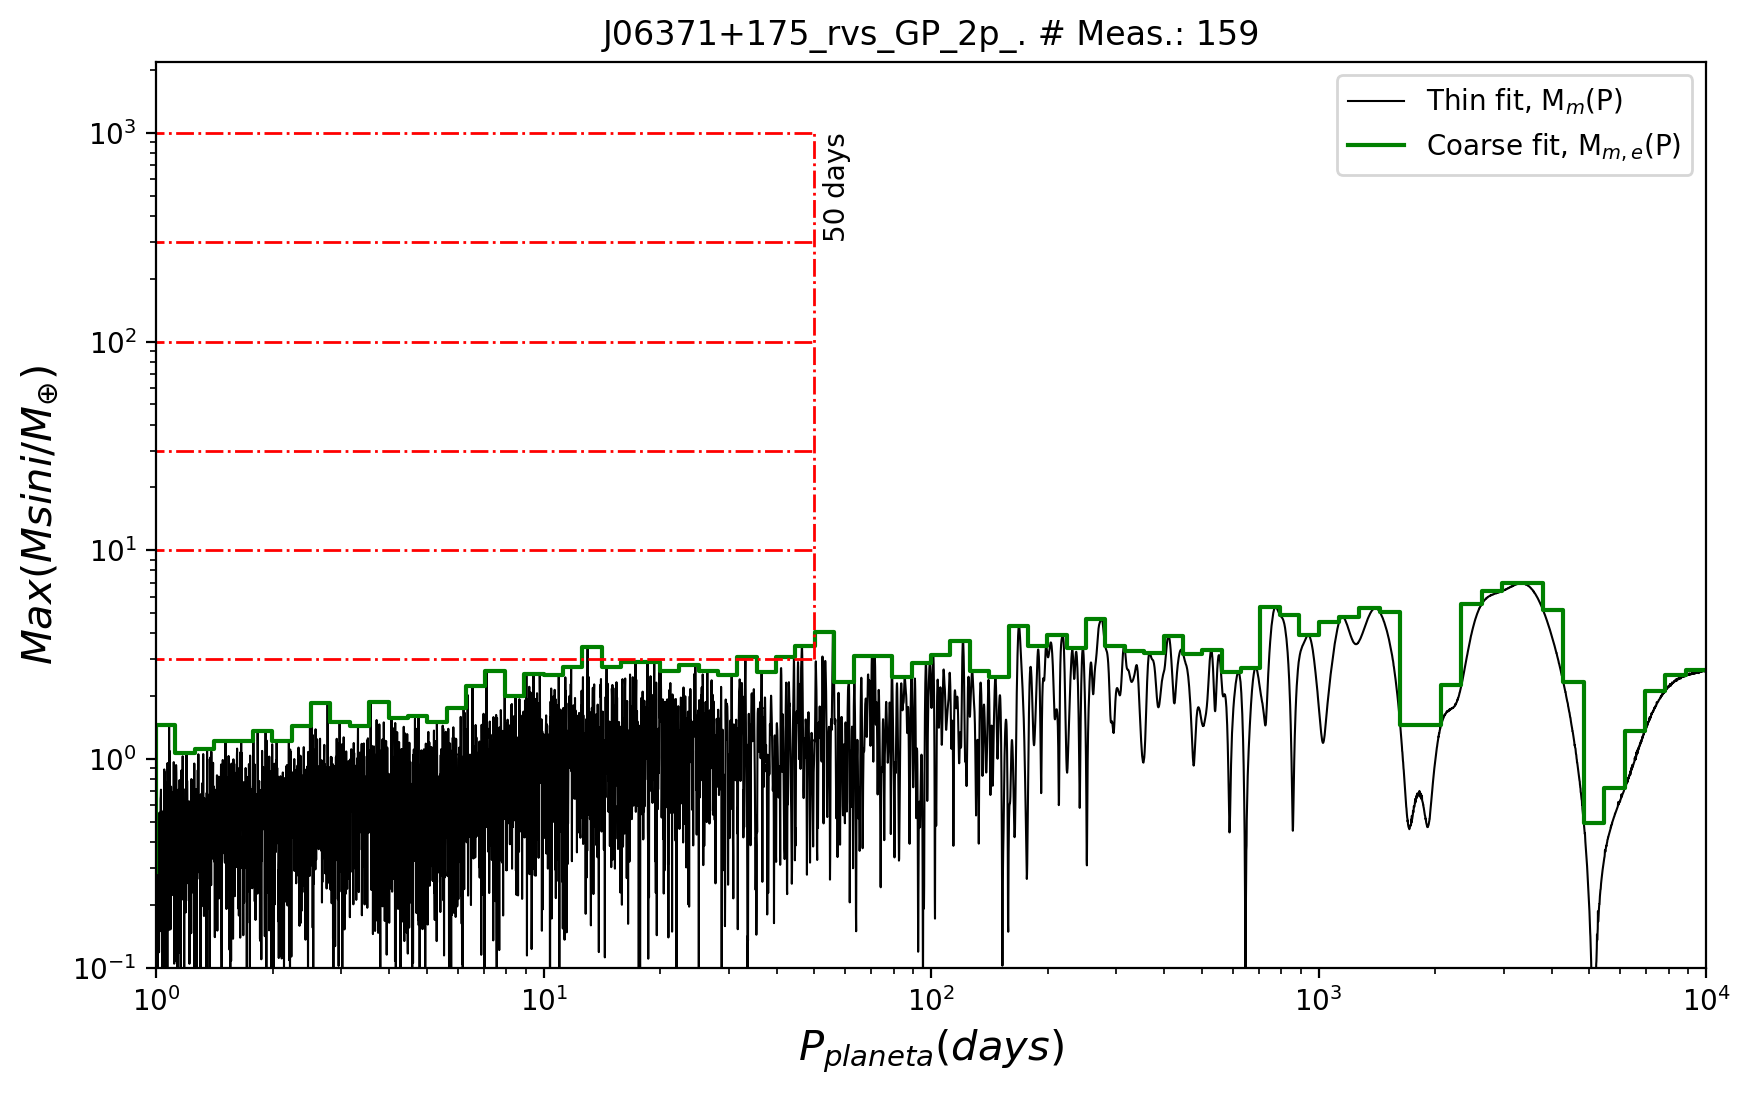

In [19]:
from utils import *
kFitList, mMinList, mEnvelopeList, mEnvelopePlotList = k_fit_funct(pathFitIn, pathFitOut, msList, len_namesPlot, rv, rvError, bjd, tau, tau_coarse, tau_coarse_plot, namesPlot)

## Taking fits from a file

In [20]:
fileFit = sorted(glob.glob(pathFitIn +  "J?????????????????????????????????????????_kfit.dat"))

kFitList = []
for i, file in enumerate(fileFit):
    print(file)
    data = np.genfromtxt(file, delimiter=";", comments='#')[:]
    kFitList.append(data)

['C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity\\J06371+175_rvs............................_kfit.dat', 'C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity\\J06371+175_rvs_2p_........................_kfit.dat', 'C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity\\J06371+175_rvs_GP........................._kfit.dat', 'C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity\\J06371+175_rvs_GP_2p_....................._kfit.dat']
C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity\J06371+175_rvs............................_kfit.dat
C:/Users/pja/Documents/Investigacion/Proyectos/CARMENES/Ciencia/Exoplanets/TESS follow-up/TOI-4599/Sensitivity\J06371+175_rvs_2p_........................_kfit.dat
C:/Us

In [21]:
mMinList = m_min_funct(kFitList,len(msList), msList, tau)

In [22]:
mEnvelopeList, mEnvelopePlotList = m_envelope_func(len(mMinList), mMinList, tau, tau_coarse)

In [23]:
for loop, name in enumerate(namesPlot): 
    file_output = open(pathOut + name + "_period.dat", "w")
    file_output.write("#Period(d);Msini(Msun)\n")
    print(loop, name)
    for loopTau, tau in enumerate(tau_coarse_plot):
         #for mass in mEnvelopePlotList[len(namesPlot)-1 - loop]:
        mass = mEnvelopePlotList[len(namesPlot)-1-loop][loopTau]
         #print(tau, mass)
        file_output.write("{};{}\n".format(tau, mass))
    file_output.close()

0 J06371+175_rvs............................
1 J06371+175_rvs_2p_........................
2 J06371+175_rvs_GP.........................
3 J06371+175_rvs_GP_2p_.....................


In [1]:
fileProb = sorted(glob.glob(pathOut +  "J?????????????????????????????????????????_period.dat"))

names = []
period = []
mass = []
for i, file in enumerate(fileProb):
    names.append(file[len(pathOut):-len("_period.dat")])
    print(file)
    data = np.genfromtxt(file, delimiter=";", comments='#')[:,0:]
    period.append(data[:,0])
    mass.append(data[:,1])
names

NameError: name 'glob' is not defined